# Ways to Visualize Top Count With Atoti

Given different categories of items, we will explore how to achieve the following with Atoti:

* Visualize top 10 apps with the highest rating in table.
* Visualize top 10 categories with most number of apps rated 5 in Pie chart.
* Visualize top 10 apps for each category in subplots.

See [pandas.ipynb](pandas.ipynb) to see how we can achieve the similar top count with Pandas.

💡 **Note:** We are using the [Google Play Store Apps data](https://www.kaggle.com/lava18/google-play-store-apps) from Kaggle. Data has been processed to convert strings with millions and thousands abbreviations into numeric data.

<div style="text-align:center"><a href="https://www.atoti.io/?utm_source=gallery&utm_content=top-count-atoti" target="_blank" rel="noopener noreferrer"><img src="https://data.atoti.io/notebooks/banners/Discover-Atoti-now.png" alt="Atoti table" /></a></div>

## Top count with Atoti

In [1]:
import atoti as tt

session = tt.Session.start(tt.SessionConfig(user_content_storage="./content", port=55707))

In [2]:
playstore = session.read_csv(
    "s3://data.atoti.io/notebooks/topcount/googleplaystore_cleaned.csv",
    table_name="playstore",
    keys=["App", "Category", "Genres", "Current Ver"],
    types={"Reviews": tt.type.FLOAT, "Installs": tt.type.FLOAT},
    process_quotes=True,
)

playstore.head()

,,,,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Android Ver
App,Category,Genres,Current Ver,,,,,,,,,
Weather forecast,WEATHER,Weather,1.11.93,4.8,159455.0,10000000.0,1000000.0,Free,0.0,Everyone,"May 8, 2018",4.4 and up
Weather Live Pro,WEATHER,Weather,1.3,4.8,17493.0,11000000.0,100000.0,Paid,4.49,Everyone,"April 20, 2018",4.4 and up
Live Weather Pro,WEATHER,Weather,1.1,4.8,892.0,17000000.0,10000.0,Free,0.0,Everyone,"July 17, 2018",4.4 and up
ez Share Android app,PHOTOGRAPHY,Photography,3.2.6,3.3,1461.0,13000000.0,100000.0,Free,0.0,Everyone,"August 31, 2017",2.3 and up
myQ,TOOLS,Tools,3.2.0,3.6,3642.0,29000000.0,100000.0,Free,0.0,Everyone,"July 23, 2018",4.0.3 and up


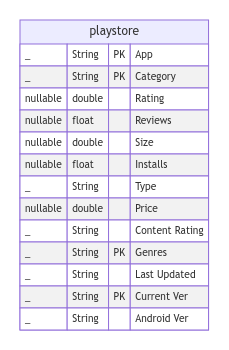

In [3]:
cube = session.create_cube(playstore, "Google Playstore")
session.tables.schema

### Top 10 apps with highest rating across categories

Use the content editor to apply a top count filter on the pivot table.

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
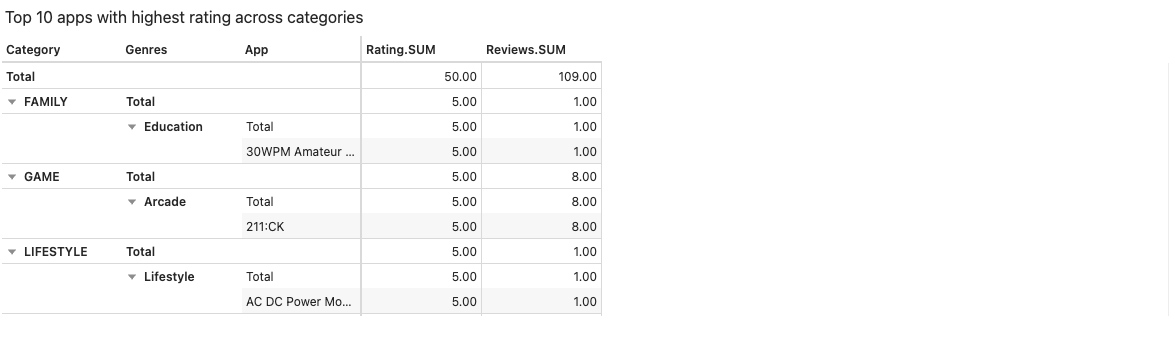

In [4]:
session.widget

### Top 10 categories with the most number of apps rated 5

In [5]:
h, l, m = cube.hierarchies, cube.levels, cube.measures
m

{'Price.SUM': <atoti.measure.Measure object at 0x117c112a0>, 'Size.SUM': <atoti.measure.Measure object at 0x117c12fb0>, 'contributors.COUNT': <atoti.measure.Measure object at 0x117c139a0>, 'Rating.SUM': <atoti.measure.Measure object at 0x117c13a60>, 'Installs.SUM': <atoti.measure.Measure object at 0x117c139d0>, 'Installs.MEAN': <atoti.measure.Measure object at 0x117c13a30>, 'Rating.MEAN': <atoti.measure.Measure object at 0x117c13b50>, 'Reviews.MEAN': <atoti.measure.Measure object at 0x117c13cd0>, 'update.TIMESTAMP': <atoti.measure.Measure object at 0x117c13760>, 'Price.MEAN': <atoti.measure.Measure object at 0x117c13c10>, 'Size.MEAN': <atoti.measure.Measure object at 0x117c13c70>, 'Reviews.SUM': <atoti.measure.Measure object at 0x117c12950>}

#### Number of apps rated 5

Create a measure that counts the number of apps rated 5 within categories and at levels below the category.

In [6]:
m["Count with rating 5"] = tt.agg.sum(
    tt.where(m["Rating.MEAN"] == 5, m["contributors.COUNT"], 0),
    scope=tt.OriginScope(levels={l["Category"], l["App"]}),
)

We can drill down to different levels from category and the count is computed on the fly.

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
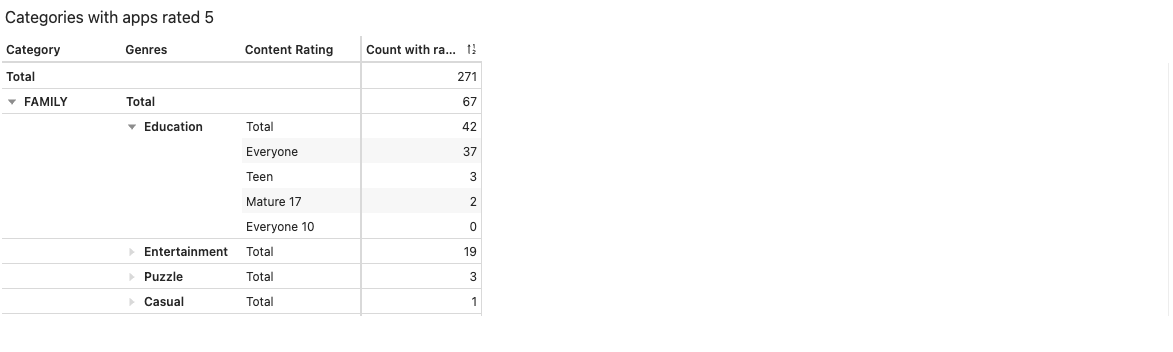

In [7]:
session.widget

Apply top count filter from **Atoti editor** on the category by the `Count with rating 5` measure. The Atoti editor is the Atoti's Jupyterlab extension on the right with the <img src="https://data.atoti.io/notebooks/topcount/Atoti-extension-logo.png" alt="a." width="25"> icon.

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
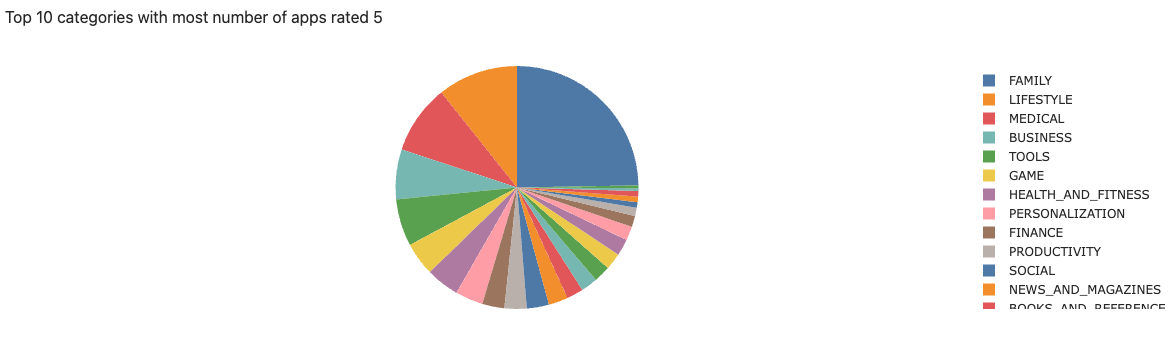

In [8]:
session.widget

### Top 10 apps for each category

Since we are performing top 10 apps filtering for each category, it's only right that we classify `App` under `Category`. In this case, we create a multi-level hierarchy such as the following:

In [9]:
h["App Categories"] = [l["Category"], l["App"]]
h

{('playstore', 'Android Ver'): <atoti.hierarchy.Hierarchy object at 0x117c74370>, ('playstore', 'Category'): <atoti.hierarchy.Hierarchy object at 0x117c75a20>, ('playstore', 'Genres'): <atoti.hierarchy.Hierarchy object at 0x117cc45b0>, ('playstore', 'App'): <atoti.hierarchy.Hierarchy object at 0x117cc4610>, ('playstore', 'Type'): <atoti.hierarchy.Hierarchy object at 0x117cc4670>, ('playstore', 'Content Rating'): <atoti.hierarchy.Hierarchy object at 0x117cc46d0>, ('playstore', 'Current Ver'): <atoti.hierarchy.Hierarchy object at 0x117cc4730>, ('playstore', 'Last Updated'): <atoti.hierarchy.Hierarchy object at 0x117cc4790>, ('playstore', 'App Categories'): <atoti.hierarchy.Hierarchy object at 0x117cc47f0>}

This structure allows us to select at which level we want to apply the top count on in a multilevel hierarchy from the Atoti editor.  
<img src="https://data.atoti.io/notebooks/topcount/filter_by_category.png" alt="Filter by level" width="30%">

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
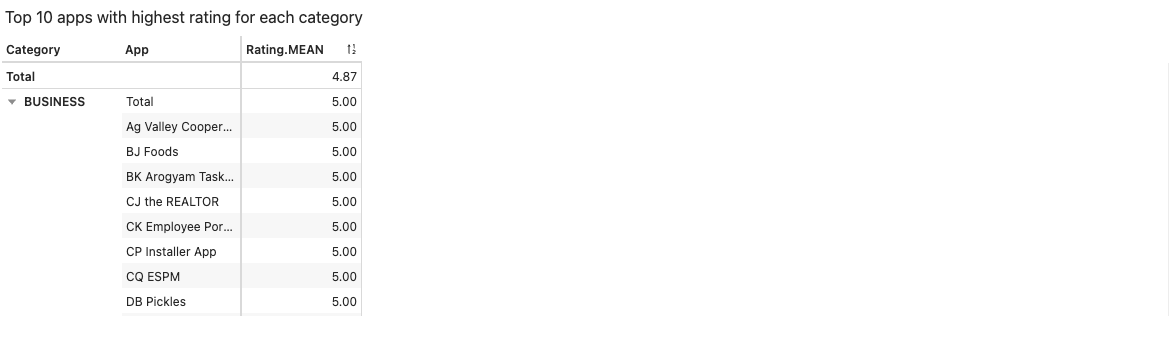

In [10]:
session.widget

#### Creating subplot to visualize top count per category

Again, go to the Atoti's Jupyterlab extension and add `Category` level to the subplot section.  
<img src="https://data.atoti.io/notebooks/topcount/atoti_subplot_controls.png" alt="create subplot" width="30%">

Slice the pie chart is by `Apps` and apply filter on `App` level of the `App Categories`

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
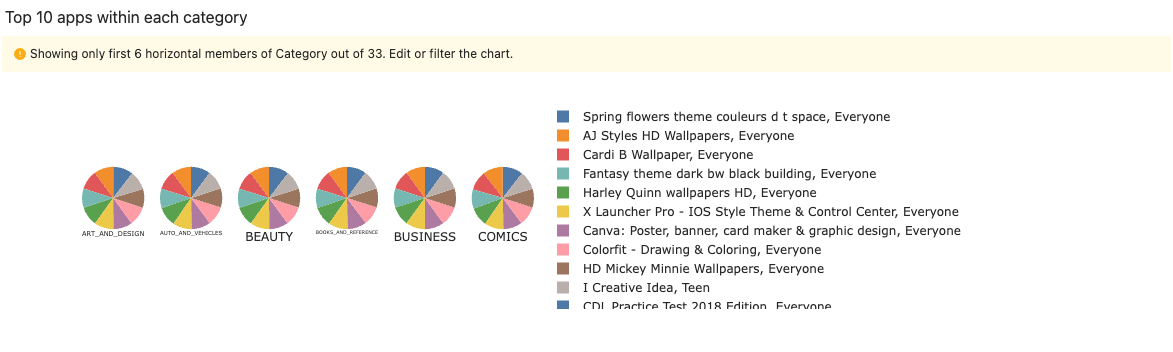

In [11]:
session.widget

You can use the filter to select the categories that you want to view. Alternative, use `session.link` to access the web application to build an interactive dashboard with quick filters. Check out the link below.

In [12]:
session.link / "#/dashboard/767"

http://localhost:55707/#/dashboard/767

<div style="text-align:center"><a href="https://www.atoti.io/?utm_source=gallery&utm_content=top-count-atoti" target="_blank" rel="noopener noreferrer"><img src="https://data.atoti.io/notebooks/banners/Your-turn-to-try-Atoti.jpg" alt="Atoti table" /></a></div>